# Lab 9: Audio Signal Manipulation
### **Introduction to Communication Systems** - Fall 2020
**Dr. Noureldin Elmadany** <br>
**TAs: Eng. Mariham Rezk & Eng. Mahmoud Shabaan**

In this lab , we will manipualte audio files by fitlering the signal, playing the audio before and after filtering. 
Spectograms and convolution will be introduced. 

In [1]:
# First, the usual bookkeeping
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [ ]:
# We define some useful constants:
pii = np.pi # Identifying pi 
j = np.complex(0,1) # identifying the complex number j

Now, we redefine the time_axis function using sampling frequency = 20 * fm

In [3]:
def time_axis(fm):
    """
    Function that resturn time axis ranging from -2 * fm to 2 * fm with sampling frequency fs  = 20 * fm
    fm : signal frequency
    fs: sampling frequecny 
    return t: time axis 
    """
    fs = 20 * fm
    ts =1 / fs
    t = np.arange(-2 / fm, 2 / fm, ts)
    return t, fs

In [4]:
#Basic rectangular pulse
def rect(t,l):
    """
    Function that creates a rectagular Pulse signal with time axis t
    t : time
    return rectagular pulse signal 
    """
    return  1*(abs(t) < l)

### Creating some signals <br>
**1. Sin Waveform** <br>
X=$sin(2*\pi*fm*t) $ <br>
Define a sine waveform with frequency = 2 Hz. Then, plot the waveform in time.

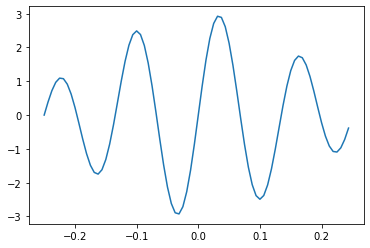

In [5]:
# Your code here
fm = 8
t1, fs1 = time_axis(fm)
x = np.sin(2 * pii * fm * t1) + np.sin(2 * pii *6 * t1) + np.sin(2 * pii * 8 * t1)

plt.plot(t1,x)

**2. Rect pulse waveform** <br>
Plot a rectangular pulse waveform, zero centered and width =2.


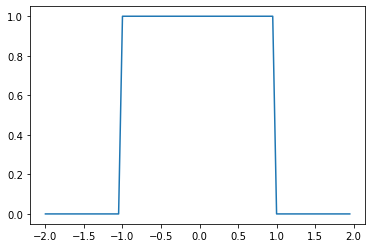

In [6]:
t_rect, fs_rect = t1, fs1 = time_axis(1)
x2 = rect(t_rect,1)

plt.plot(t_rect, x2)

### **Fourier Transform and Inverse Transform**  <br>

In Python, we will use the `fft` module in Numpy to compute the DFT, and `ifft` to compute inverse DFT

Check the following link for the documenation of  the `fft` module:
[link text]((https://numpy.org/doc/stable/reference/routines.fft.html))

In [7]:
def Fourier_Transform (x,fs):
    """
    Function that calculates the fourier tranform of a given signal x
    x : Input signal
    fs : sampling frequency of input signal
    return X: calculated fourier transform of signal, f: Frequency axis for the calculated frouier transorm 
    """    
    X = np.fft.fft(x);
    f = np.fft.fftfreq(len(X), (1/fs))
    return X, f

1.Sketch the fourier Transform of the sine wave in frequency domain.

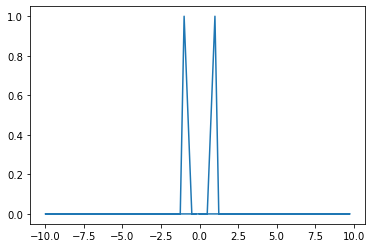

In [8]:
#Sin/Cos Wave
y, f = Fourier_Transform(x, fs1)

plt.plot(f, abs(y) / len(y))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Work\AppData\Local\Temp/ipykernel_19476/3832791228.py:6: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=80).
  plt.specgram(tt, Fs = fs1)


Text(0, 0.5, 'Frequency')

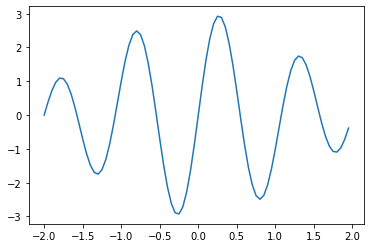

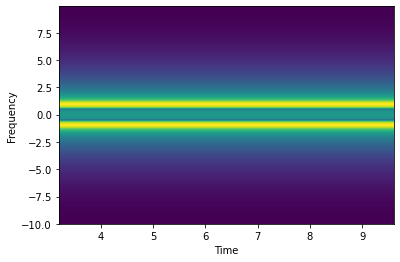

In [21]:
tt = np.fft.ifft(y  )

plt.plot(t1, tt)
plt.figure()

plt.specgram(tt, Fs = fs1)
plt.xlabel('Time')
plt.ylabel('Frequency')

2.Sketch the fourier Transform of the rect pulse in frequency domain.

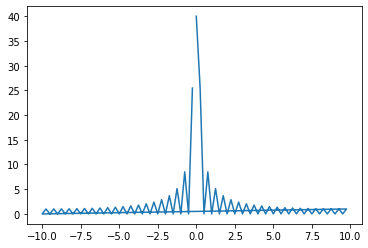

In [10]:
#rectangular pulse
y2, f2 = Fourier_Transform(x2, fs_rect)

plt.plot(f2, abs(y2))

Calculate the inverse Fourier transform of sinc above and plot it 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Work\AppData\Local\Temp/ipykernel_19476/4100092449.py:6: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=80).
  plt.specgram(tt, Fs = fs1)


Text(0, 0.5, 'Frequency')

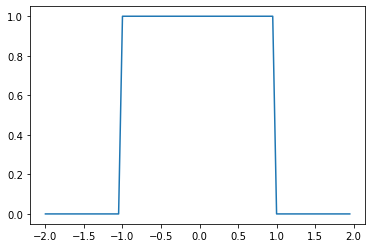

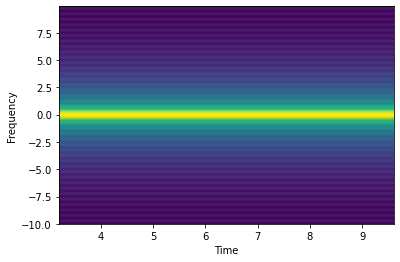

In [11]:
tt = np.fft.ifft(y2 )

plt.plot(t1, tt)
plt.figure()

plt.specgram(tt, Fs = fs1)
plt.xlabel('Time')
plt.ylabel('Frequency')


### **Fourier Transform Applicatin in real world**  <br>

The next step is to use the DFT to analyze real-world signals. As we have seen in previous examples, what we need to do is set the time interval between samples or, in other words, set the "clock" of the system. For audio, this is equivalent to the sampling rate of the file.

Here for instance is the sound of a piano.

In [12]:
import IPython
from scipy.io import wavfile
Fs, xm = wavfile.read("piano.wav")
IPython.display.Audio(xm, rate=Fs)


Now, we show the audio file in time, and plot its spectogram 

Text(0, 0.5, 'Frequency')

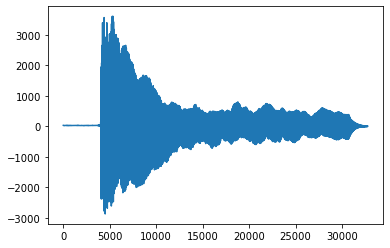

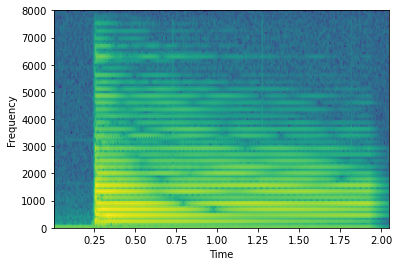

In [13]:
plt.plot(xm)

plt.figure()
plt.specgram(xm, Fs = Fs)

plt.xlabel('Time')
plt.ylabel('Frequency')

Calcualte and plot the Fourier Transform of the audio

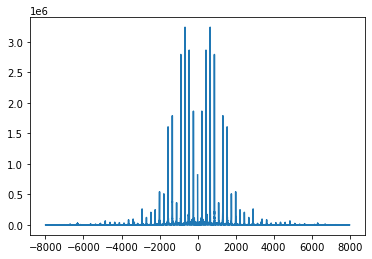

In [14]:
pianofft,f=Fourier_Transform(xm,Fs)
plt.plot(f,abs(pianofft))

Now, we would like to  filter the signal, we will use ideal rectangular widnow to filter frequencies grearer than 2000 Hz 

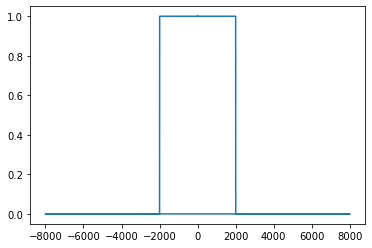

In [15]:
filter=rect(f,2000)
plt.plot(f,filter)

Apply the filter the piano wave signla.
Show the filtered signal in time and frequency domains. Also plot its spectogram

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7723: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


Text(0, 0.5, 'Frequency')

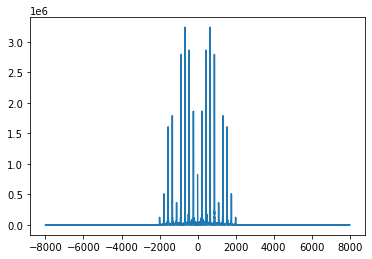

<Figure size 432x288 with 0 Axes>

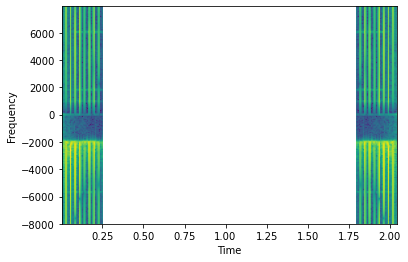

In [16]:
filtered = filter*pianofft
plt.plot(f, abs(filtered))

plt.figure()

#plt.plot(filtered)

plt.figure()
plt.specgram(filtered, Fs = Fs)

plt.xlabel('Time')
plt.ylabel('Frequency')

Apply Inverse Fourier transform to the filtered signal and play it.

In [17]:
x_filtered  = np.fft.ifft(filtered)
IPython.display.Audio(x_filtered, rate=Fs)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\display.py:159: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


Now, we show the filter in time domain

(32768,)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


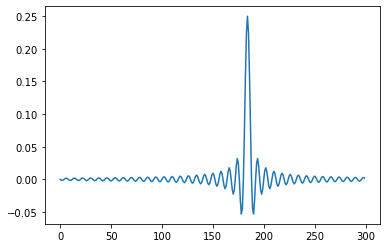

In [18]:
filtr_time = np.fft.fftshift(np.fft.ifft(filter))

#time = np.linspace()
print(filtr_time.shape)
plt.plot(filtr_time[16200:16500])

Apply the filter to the signal in time domain using convolution

C:\Users\Work\AppData\Local\Temp/ipykernel_19476/1149000261.py:5: RuntimeWarning: divide by zero encountered in true_divide
  t=(1/f)*1.999969


ValueError: x and y must have same first dimension, but have shapes (32768,) and (65535,)

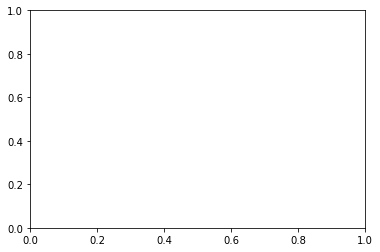

In [22]:
# Your code here
import numpy as np
filtered_2=np.convolve(filtr_time ,xm)
#filtered = filter*pianofft
t=(1/f)*1.999969
plt.plot(t, abs(filtered_2))

plt.figure()

#plt.plot(filtered)

plt.figure()
#plt.specgram(filtered, Fs = Fs)

plt.xlabel('Time')
plt.ylabel('Frequency')


Define 2 rects, one has half of the duration of the other

In [ ]:
rect1 =rect(f,1000)
rect2 = rect(f,1000/2)

plt.plot(f, rect1)
plt.plot(f, rect2)

Use `np.convolove` to convolove the 2 rects and plot the output
[link text]((https://numpy.org/doc/stable/reference/generated/numpy.convolve.html))

In [ ]:
rect_conv = np.convolve(rect1,rect2)

plt.plot(f, rect_conv,mode='valid')

Convolove rect and tri waveforms below.

In [ ]:
# Your code here 

### Exponential Filter
Now, we use exponential filter instead of rectangular filter, the exponential filter in time domain is shown in the figure below.
![exponential form](./exp1.JPG)
The magnitude and pahse response of the filter is also shown below
![exponential form](./exp2.JPG)

Define an exponential signal with a = - 2

In [ ]:
exp = np.exp(-2*t1)

plt.plot(t1, exp)

In [ ]:
exp_fft, f = Fourier_Transform(exp, fs1)

plt.plot(f, abs(exp_fft))

In [ ]:
y = np.sin(2 * pii * 1 * t1) + np.sin(2 * pii * 2 * t1)
y_fft, f = Fourier_Transform(y, fs1)

plt.plot(f, abs(y_fft))


Apply the filter to the signal above

In [ ]:
y_filtered = exp_fft*exp
plt.plot(f, abs(y_filtered))

Repeat all the manipulation performed on the piano audio of the following audio file

In [ ]:
import IPython
from scipy.io import wavfile
Fs, xm = wavfile.read("sm.wav")
IPython.display.Audio(xm, rate=Fs)

In [ ]:
plt.plot(xm)

plt.figure()
plt.specgram(xm, Fs = Fs)

plt.xlabel('Time')
plt.ylabel('Frequency')

In [ ]:
pianofft,f=Fourier_Transform(xm,Fs)
plt.plot(f,abs(pianofft))

In [ ]:
expfft,f=Fourier_Transform(exp,Fs)
plt.plot(f,abs(expfft))

In [ ]:
filtered_2 = expfft*pianofft
plt.plot(f, abs(filtered_2))

plt.figure()

#plt.plot(filtered)

plt.figure()
plt.specgram(filtered, Fs = Fs)

plt.xlabel('Time')
plt.ylabel('Frequency')
